In [103]:
import numpy as np
import time

# configuration
numOfPoints = 9
maxDistance = 20
speed = 50/60 # 50km/h
travelTime = 1000 # 400 minutes

# create waypoints randomly 
np.random.seed(int(time.time()))
latitudes = np.random.rand(numOfPoints) * maxDistance
longitudes = np.random.rand(numOfPoints) * maxDistance
stayTimes = np.random.rand(numOfPoints) * 40 # minutes
stayTimes = np.insert(stayTimes, 0, 0) # for source point

# get source, destination
source = [np.mean(latitudes), np.mean(longitudes)]
destination = source

# insert source into route
latitudes = np.insert(latitudes, 0, source[0])
# latitudes = np.insert(latitudes, len(latitudes), source[0])

longitudes = np.insert(longitudes, 0, source[1])
# longitudes = np.insert(longitudes, len(longitudes), source[1])


In [104]:
print(f"latitudes : {latitudes}\n") 
print(f"longtitudes : {longitudes}\n")
print(f"stayTimes : {stayTimes}\n")
print(f"source : {source}\n")

latitudes : [10.47952965  6.82903946 13.13536458  8.19031873  3.90310222  7.73524561
 10.92801674 13.90403052 11.12953243 18.56111662]

longtitudes : [ 9.81042767  3.35121587 15.79987688  1.31302134 18.54267069 16.40157869
  7.46684924 14.46773128  8.06888793  2.8820171 ]

stayTimes : [ 0.          9.96107188  9.80610201 26.56962814  2.32211673  6.0648213
  8.12379377 29.58121034  2.93238462 24.62447535]

source : [10.479529654280022, 9.810427668102811]



# Get disatnce Map

In [105]:
# print(f"latitudes : {latitudes}\n") 
# print(f"longitudes : {longitudes}\n")

In [106]:

distanceMap = np.zeros((len(latitudes), len(latitudes)))
for i in range(len(latitudes)):
    for j in range(len(latitudes)):
        distanceMap[i, j] =  np.sqrt(abs(latitudes[i] - latitudes[j])**2 + abs(longitudes[i] - longitudes[j])**2)
# print(f"distanceMap : ")        
# print(f"{distanceMap}")

# Get Time Map

In [107]:
timeMap = distanceMap / speed
# print(f"timeMap : ") 
# print(f"{timeMap}")

# Create route

In [108]:
def permute(points, lengthOfRoute, currTime):
    length = len(points)
    
#     print(f"current route : {points[:lengthOfRoute]}")
#     print(f"current time : {currTime}")
#     print(f"lengthOfRoute : {lengthOfRoute}")
#     print(f"maximum travelTime : {travelTime} \n")  
    
    if lengthOfRoute == length:
#         print(f"No aother waypoints !!")
#         print(f"save route : {points[:lengthOfRoute]}")
#         print(f"travel time : {currTime} \n")
        routes[lengthOfRoute-1][tuple(points[:lengthOfRoute])] = (currTime)
        return
    
    for i in range(lengthOfRoute, length):
        
        # swap points[i] and points[lengthOfRoute]
        points[i], points[lengthOfRoute] = points[lengthOfRoute], points[i]
        
        # add travel time between end point and new point
        extraTime = timeMap[points[lengthOfRoute-1], points[lengthOfRoute]]
        
        # add stayTime of new point
        extraTime += stayTimes[points[lengthOfRoute]]
        
        # add travel time between new point and destination(source)
        extraTime += timeMap[points[lengthOfRoute], 0]
        
        if (currTime + extraTime) > travelTime:
#             print(f"next point : {points[lengthOfRoute]}")
#             print(f"extra travel time : {timeMap[points[lengthOfRoute-1], points[lengthOfRoute]]}")
#             print(f"extra stayTime : {stayTimes[points[lengthOfRoute]]}")
#             print(f"extra return time : {timeMap[points[lengthOfRoute], 0]}")
#             print(f"save route : {points[:lengthOfRoute]}")
#             print(f"travel time : {currTime + extraTime} \n")
            routes[lengthOfRoute-1][tuple(points[:lengthOfRoute])] = currTime
        else:
            # substract travel time between new point and destination from time
            extraTime -= timeMap[points[lengthOfRoute], 0]
            permute(points, lengthOfRoute + 1, currTime + extraTime)
        
        # recover points to origin
        points[i], points[lengthOfRoute] = points[lengthOfRoute], points[i]        
            

In [109]:
# for routes which have 0 waypoints to numOfPoints waypoints(except for source and destination)
# print(f"timeMap : ")
# print(f"{timeMap}\n")
# print(f"stayTimes : ")
# print(f"{stayTimes}\n")
routes = [{} for _ in range(numOfPoints+1)]
start = time.time()
permute([x for x in range(numOfPoints+1)], 1, 0)
print(time.time() - start)
# print(f"routes : ")
# print(routes)

2.0205271244049072


# Display routes

[ 9.81042767  3.35121587 15.79987688  1.31302134 18.54267069 16.40157869
  7.46684924 14.46773128  8.06888793  2.8820171 ]
[10.47952965  6.82903946 13.13536458  8.19031873  3.90310222  7.73524561
 10.92801674 13.90403052 11.12953243 18.56111662]


<IPython.core.display.Javascript object>


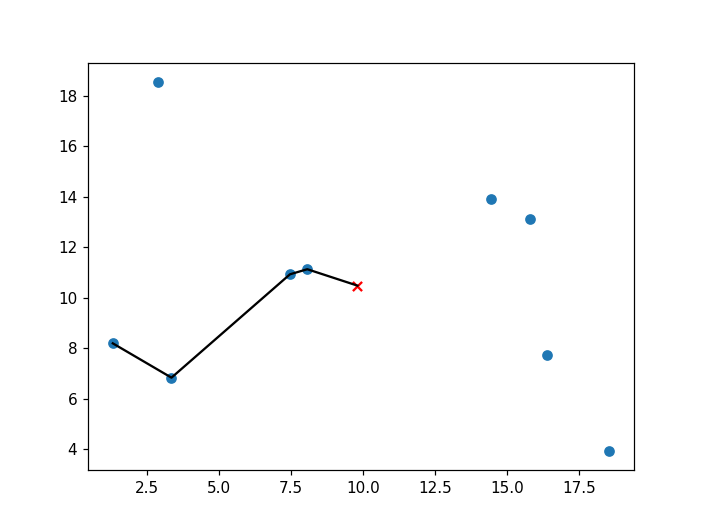

In [110]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import time
%matplotlib notebook


def update(frames):
    global longitudes
    global latitudes
    global route
    print(longitudes)
    line.set_data(longitudes[route[:frames]], latitudes[route[:frames]])
    return line, 

print(longitudes)
print(latitudes)

longest = []
for diff_len in routes[::-1]:
    if diff_len:
        longest = diff_len
        break
        
# print(r)            
# route = r.pop()
# print(longest.items())
sorted_routes = sorted(longest.items(), key=lambda d: d[1])

# get route which fits travel time the most
route = sorted_routes[0][0]

# insert destination to route
route = np.insert(route, len(route), 0)
# print(route)

lngs = longitudes[route[0]]
lats = latitudes[route[0]]
fig, ax = plt.subplots()
plt.scatter(longitudes[0], latitudes[0], color="red", marker="x")
plt.scatter(longitudes[1:], latitudes[1:])
line,  = plt.plot(lngs, lats, color="black")
ani = animation.FuncAnimation(fig, update, frames=range(len(route) + 1) ,blit=True, interval=1000, repeat=True)

In [111]:
def permute(sequence, index=0):
    length = len(sequence)

    if index > length - 1:
        raise StopIteration

    if index == length - 1:
        yield sequence
    else:
        for i in range(index, length):
            sequence[i], sequence[index] = sequence[index], sequence[i]
            for permutation in permute(sequence, index + 1):
                yield permutation
            sequence[index], sequence[i] = sequence[i], sequence[index]

for permutation in permute([1, 2]):
    print(permutation)

[1, 2]
[2, 1]


1. complexity : O(n!) => if 25 waypoints, our algo would be slow (dangerous if someone attach server)
2. if someone set long travelTime but small waypoints could make distort route
3. whether nodejs could call python directly



4. 運算時間 4s 內
5. speed = 40 mile/per h
6. height = travel time * speed / const ratio

In [92]:
plt.scatter([1], [2], marker="x")

Traceback (most recent call last):
  File "/home/junru468579/anaconda3/envs/hlp2020spring_hw2/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/junru468579/anaconda3/envs/hlp2020spring_hw2/lib/python3.8/site-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


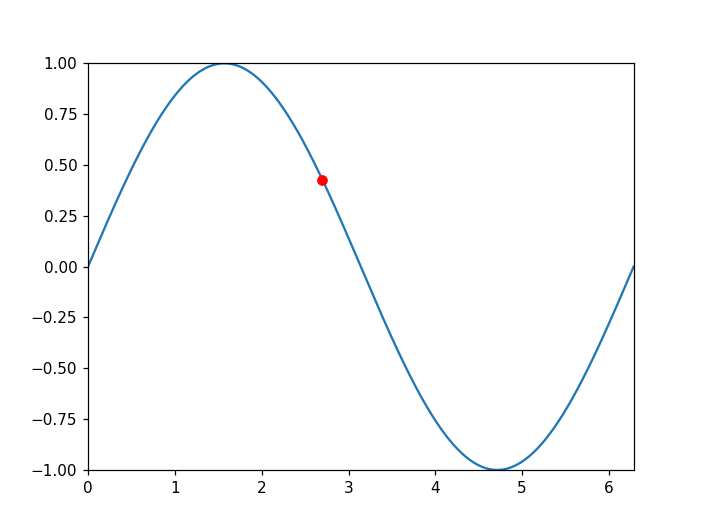

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

plt.show()